In [2]:
# TensorFlow提供了数据集读取方法

import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data

mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
print('训练集数量：',mnist.train.num_examples,
      '验证集数量：',mnist.validation.num_examples,
      '测试集数量：',mnist.test.num_examples)

训练集数量： 55000 验证集数量： 5000 测试集数量： 10000


In [4]:
# 28*28=784, 10分类one hot编码
print('train images shape:', mnist.train.images.shape,
      'labels shape:', mnist.train.labels.shape)

train images shape: (55000, 784) labels shape: (55000, 10)


## 显示图像

In [10]:
import matplotlib.pyplot as plt

def plot_image(image):
    plt.imshow(image.reshape(28, 28), cmap='binary')
    plt.show()

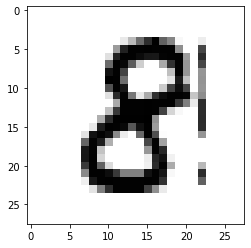

In [11]:
plot_image(mnist.train.images[9])

## 构建模型

In [12]:
## 定义带输入数据的占位符
x = tf.placeholder(tf.float32, [None, 784], name='X')

y = tf.placeholder(tf.float32, [None, 10], name='Y')

In [13]:
# 定义模型变量
# 以正态分布的随机树初始化权重，以0初始化偏置
W = tf.Variable(tf.random_normal([784, 10]), name='W')
b = tf.Variable(tf.zeros([10]), name='b')

### 定义前向计算

In [14]:
# 单个神经元构建神经网络
forward = tf.matmul(x, W) + b

In [15]:
pred = tf.nn.softmax(forward) # softmax分类

## 训练模型

In [48]:
# 设置训练参数
train_epochs = 150 # 训练轮数
batch_size =100 # 单次训练样本数
total_batch = int(mnist.train.num_examples/batch_size) # 一轮训练有多少批次
display_step = 5 # 显示粒度
learning_rate = 0.04 # 学习率

In [49]:
## 定义损失函数
loss_function = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred),
                                             reduction_indices=1))

In [50]:
## 选择优化器-梯度下降优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

In [51]:
## 定义准确率
## 检查预测类别tf.argmax(pred, 1)与实际类别tf.argmax(y, 1)的匹配情况
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y,1))

In [52]:
# 准确率，将布尔值转化为浮点数，并计算平均值
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [53]:
sess = tf.Session() # 声明会话
init = tf.global_variables_initializer() # 变量初始化
sess.run(init)

## 模型训练

In [54]:
## 开始训练
for epoch in range(train_epochs):
    for batch in range(total_batch):
        xs, ys = mnist.train.next_batch(batch_size) # 读取批次数据
        sess.run(optimizer, feed_dict={x:xs, y:ys}) # 执行批次训练
        
    # total_batch个批次训练完成后，使用验证数据计算误差与准确率，验证集没有分批
    loss, acc = sess.run([loss_function, accuracy], 
                         feed_dict={x:mnist.validation.images, y:mnist.validation.labels})
    
    # 打印训练过程中的详细信息
    if(epoch+1) % display_step ==0:
        print('Train Epoch:', '%02d' % (epoch+1), 'loss=', '{:.9f}'.format(loss),\
             'Accuracy=', '{:.4f}'.format(acc))
print('Train Finished!')

Train Epoch: 05 loss= 0.922850370 Accuracy= 0.8132
Train Epoch: 10 loss= 0.692761838 Accuracy= 0.8528
Train Epoch: 15 loss= 0.595244706 Accuracy= 0.8676
Train Epoch: 20 loss= 0.541166306 Accuracy= 0.8792
Train Epoch: 25 loss= 0.503134072 Accuracy= 0.8860
Train Epoch: 30 loss= 0.476438969 Accuracy= 0.8910
Train Epoch: 35 loss= 0.454614460 Accuracy= 0.8952
Train Epoch: 40 loss= 0.437152594 Accuracy= 0.8974
Train Epoch: 45 loss= 0.422274262 Accuracy= 0.8984
Train Epoch: 50 loss= 0.411092788 Accuracy= 0.9008
Train Epoch: 55 loss= 0.399969727 Accuracy= 0.9008
Train Epoch: 60 loss= 0.390044361 Accuracy= 0.9034
Train Epoch: 65 loss= 0.382566392 Accuracy= 0.9042
Train Epoch: 70 loss= 0.375315249 Accuracy= 0.9058
Train Epoch: 75 loss= 0.369333982 Accuracy= 0.9072
Train Epoch: 80 loss= 0.364050746 Accuracy= 0.9046
Train Epoch: 85 loss= 0.358366638 Accuracy= 0.9078
Train Epoch: 90 loss= 0.353548110 Accuracy= 0.9080
Train Epoch: 95 loss= 0.349853843 Accuracy= 0.9086
Train Epoch: 100 loss= 0.345467

## 评估模型

### 完成训练后，在测试集上评估模型的准确率

In [55]:
accu_test = sess.run(accuracy, 
                     feed_dict={x:mnist.test.images, y:mnist.test.labels})

print('Test Accuracy:', accu_test)

Test Accuracy: 0.9101


### 完成训练后，在验证集上评估模型的准确率

In [56]:
accu_validation = sess.run(accuracy, 
                     feed_dict={x:mnist.validation.images, y:mnist.validation.labels})

print('Validation Accuracy:', accu_validation)

Validation Accuracy: 0.9152


### 完成训练后，在训练集上评估模型的准确率

In [57]:
accu_train = sess.run(accuracy,
                     feed_dict={x:mnist.train.images, y:mnist.train.labels})
print('Train Accuracy:', accu_train)

Train Accuracy: 0.91587275


## 模型应用

### 在建立模型并进行训练后，若认为准确率可以接受，则可以使用此模型进行预测

In [58]:
# 由于pred预测结果是one-hot编码格式，所以需要转换为0~9数字
prediction_result = sess.run(tf.argmax(pred, 1),
                             feed_dict={x:mnist.test.images})

In [59]:
# 查看预测结果中的前10项
prediction_result[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=int64)

## 可视化预测结果

In [60]:
import matplotlib.pyplot as plt
import numpy as np

def plot_images_labels_prediction(images,# 图像列表
                                  labels, # 标签列表
                                  prediction, # 预测值列表
                                  index, # 从第index个开始显示
                                  num=10):# 缺省一次显示10幅
    fig = plt.gcf() # 获取当前图表
    fig.set_size_inches(10, 12) # 1英寸等于2.54cn
    if num > 25:
        num = 25 #最多显示25个子图
        
    for i in range(0, num):
        ax = plt.subplot(5,5,i+1) # 获取当前要处理的子图
        ax.imshow(np.reshape(images[index], (28, 28)), # 显示第index个图像
                 cmap='binary')
        
        title = 'label=' + str(np.argmax(labels[index])) # 构建该图上要显示的title
        if len(prediction)>0:
            title += ',prediction=' + str(prediction[index]) 
        
        ax.set_title(title, fontsize=10) # 显示图上的title信息
        ax.set_xticks([])
        ax.set_yticks([])
        index +=1
        
    plt.show()

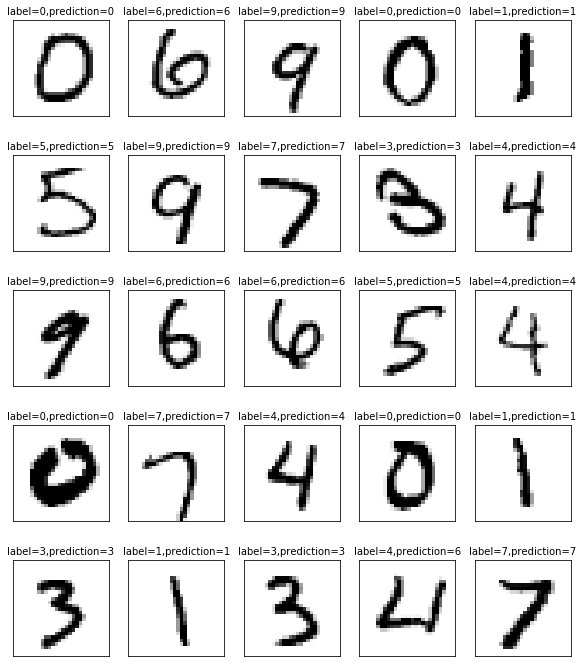

In [61]:
plot_images_labels_prediction(mnist.test.images,
                              mnist.test.labels,
                              prediction_result, 10, 25)